### Kelompok
Muhammad Abdul Aziz     2241727023
Teo Wisnu Widiantoro    2241727038

### Prediksi Angka GDP Sebuah Negara Pada Masa Pandemi

Pandemi Covid-19 ini telah berdampak banyak pada seluruh bidang dalam kehidupan, salah satu bidang yang terpengaruh adalah ekonomi sebuah negara. Angka yang dapat merepresentasikan kondisi ekonomi pada sebuah negara adalah GDP (Gross Domestic Product).
Gross Domestic Product (GDP) / Produk Domestik Bruto (PDB) adalah perhitungan yang digunakan oleh suatu negara sebagai ukuran utama bagi aktivitas perekonomian nasionalnya, tetapi pada dasarnya GDP/PDB mengukur seluruh volume produksi dari suatu wilayah negara secara geografis.

Maka dari itu kami ingin membuat model yang dapat memprediksi berapa angka GDP sebuah negara dengan beberapa input seperti HDI, Population, Continent, dan Total Covid Case

### Pre Processing

In [1]:
pip install pycountry_convert --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc
from datetime import datetime as dt
import os


In [7]:
df = pd.read_csv('transformed_data.csv')
df = df.dropna()
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [8]:
df.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,44216.000000,44216.000000,44216.000000,44216.000000,44216.000000
mean,0.720139,7.102211,3.729883,3.372483,16.018503,9.154138
std,0.160902,3.676823,3.111586,1.534602,1.932219,1.753255
min,0.000000,0.000000,0.000000,0.000000,10.548940,0.000000
25%,0.601000,4.672829,0.000000,3.324316,14.901792,8.421078
50%,0.752000,7.577634,3.663562,4.050219,16.127974,9.492126
75%,0.847000,9.827902,5.966147,4.353884,17.326136,10.266848
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


In [9]:
df = df[(df[['HDI', 'TC', 'TD', 'STI', 'GDPCAP']] != 0).all(axis=1)]
df.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,29007.000000,29007.000000,29007.000000,29007.000000,29007.000000,29007.000000
mean,0.726251,8.929209,5.171392,4.096493,16.452885,9.354209
std,0.155843,2.355121,2.541086,0.414699,1.603183,1.199066
min,0.354000,0.693147,0.693147,1.022451,12.568529,6.494117
25%,0.608000,7.246368,3.258097,3.893248,15.445029,8.524111
50%,0.754000,8.891099,4.875197,4.227126,16.272792,9.550298
75%,0.853000,10.689692,6.850656,4.389002,17.509937,10.314111
max,0.953000,15.864821,12.277328,4.605170,21.087439,11.669379


In [10]:
df.isnull().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64

In [11]:
country = df.drop_duplicates(subset=['CODE'], keep='last')

In [12]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 279 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     151 non-null    object 
 1   COUNTRY  151 non-null    object 
 2   DATE     151 non-null    object 
 3   HDI      151 non-null    float64
 4   TC       151 non-null    float64
 5   TD       151 non-null    float64
 6   STI      151 non-null    float64
 7   POP      151 non-null    float64
 8   GDPCAP   151 non-null    float64
dtypes: float64(6), object(3)
memory usage: 11.8+ KB


In [13]:
country = country.reset_index()
country.drop('index', inplace=True, axis=1)
country

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2020-10-05,0.498,10.580023,7.287561,3.218876,17.477233,7.497754
1,ALB,Albania,2020-10-05,0.785,9.565634,5.981414,3.773221,14.872537,9.376146
2,DZA,Algeria,2020-10-12,0.754,10.879405,7.496097,4.329812,17.596309,9.540639
3,AGO,Angola,2020-10-08,0.581,8.652598,5.327876,4.266896,17.307957,8.668969
4,ARG,Argentina,2020-10-09,0.825,13.660441,10.030561,4.476882,17.626514,9.848710
...,...,...,...,...,...,...,...,...,...
146,VEN,Venezuela,2020-10-15,0.761,11.350465,6.570883,4.476882,17.163165,9.725856
147,VNM,Vietnam,2020-10-19,0.694,7.033506,3.555348,3.948355,18.393706,8.727759
148,YEM,Yemen,2020-10-12,0.452,7.628031,6.390241,3.814851,17.210890,7.299221
149,ZMB,Zambia,2020-10-05,0.588,9.619266,5.808142,3.794140,16.726989,8.213179


In [14]:
country.drop(['COUNTRY', 'DATE'], inplace=True, axis=1)
country

,CODE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,0.498,10.580023,7.287561,3.218876,17.477233,7.497754
1,ALB,0.785,9.565634,5.981414,3.773221,14.872537,9.376146
2,DZA,0.754,10.879405,7.496097,4.329812,17.596309,9.540639
3,AGO,0.581,8.652598,5.327876,4.266896,17.307957,8.668969
4,ARG,0.825,13.660441,10.030561,4.476882,17.626514,9.848710
...,...,...,...,...,...,...,...
146,VEN,0.761,11.350465,6.570883,4.476882,17.163165,9.725856
147,VNM,0.694,7.033506,3.555348,3.948355,18.393706,8.727759
148,YEM,0.452,7.628031,6.390241,3.814851,17.210890,7.299221
149,ZMB,0.588,9.619266,5.808142,3.794140,16.726989,8.213179


<AxesSubplot:>

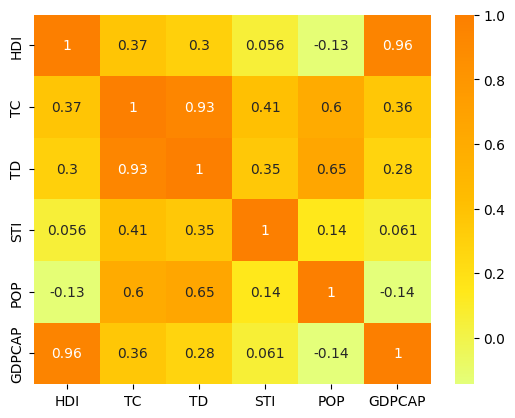

In [15]:
corr = country[['HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP']].corr()
sns.heatmap(corr, cmap='Wistia', annot = True)

In [16]:
country.drop(['TD', 'STI'], inplace=True, axis=1)

In [17]:
country_code = country['CODE'].unique().tolist()
alpha2_code = []
for i in country_code:
    alpha2_code.append(pc.country_alpha3_to_country_alpha2(i))
continent_code = []
for i in alpha2_code:
    try:
        continent_code.append(pc.country_alpha2_to_continent_code(i))
    except:
        continent_code.append('Unknown')
        
country['CONTINENT'] = continent_code
country
        

,CODE,HDI,TC,POP,GDPCAP,CONTINENT
0,AFG,0.498,10.580023,17.477233,7.497754,AS
1,ALB,0.785,9.565634,14.872537,9.376146,EU
2,DZA,0.754,10.879405,17.596309,9.540639,AF
3,AGO,0.581,8.652598,17.307957,8.668969,AF
4,ARG,0.825,13.660441,17.626514,9.848710,SA
...,...,...,...,...,...,...
146,VEN,0.761,11.350465,17.163165,9.725856,SA
147,VNM,0.694,7.033506,18.393706,8.727759,AS
148,YEM,0.452,7.628031,17.210890,7.299221,AS
149,ZMB,0.588,9.619266,16.726989,8.213179,AF


<Figure size 1000x800 with 0 Axes>

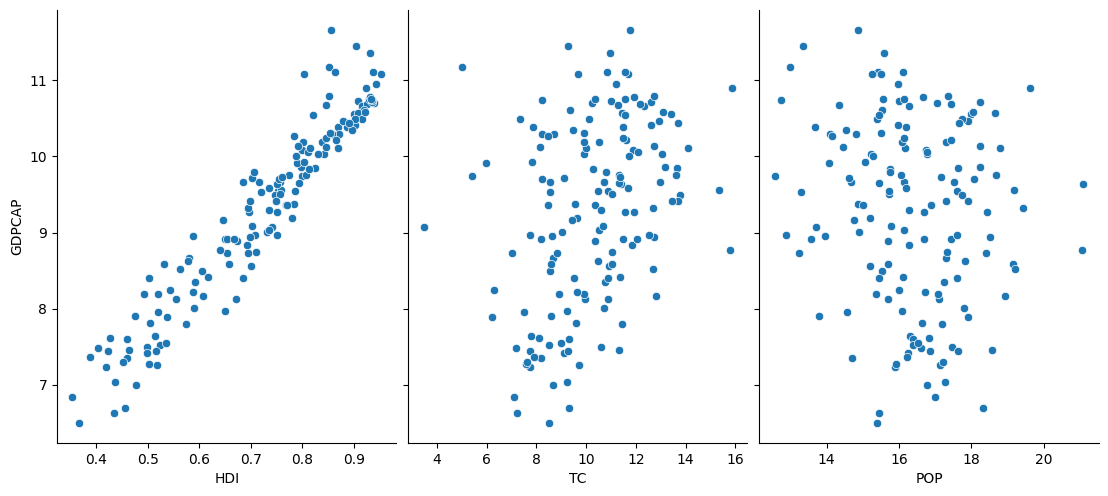

In [18]:
plt.figure(figsize=(10,8))
sns.pairplot(data=country, x_vars=['HDI', 'TC', 'POP'], y_vars=['GDPCAP'], height=5, aspect=0.75)
plt.show()

In [19]:
continent = country.groupby(by="CONTINENT").size()
continent

CONTINENT
AF    46
AS    38
EU    36
NA    15
OC     4
SA    12
dtype: int64

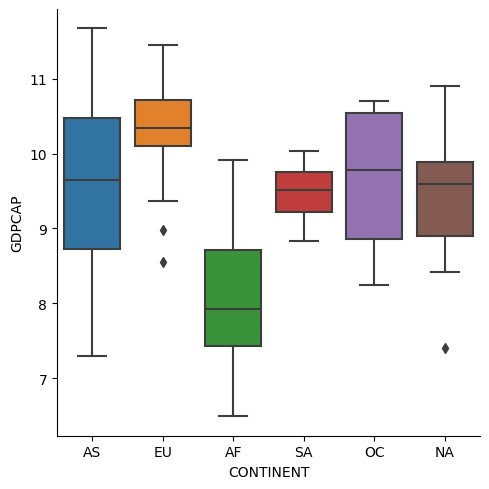

<Figure size 1000x800 with 0 Axes>

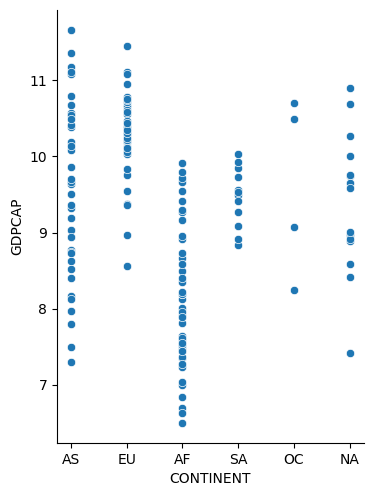

In [20]:
sns.catplot(data=country, x='CONTINENT', y='GDPCAP', kind='box')
plt.figure(figsize=(10,8))
sns.pairplot(data=country, x_vars=['CONTINENT'], y_vars=['GDPCAP'], height=5, aspect=0.75)
plt.show()

In [21]:
continent_mapping = {'AS':1,
                    'EU':2,
                    'NA':3,
                    'OC':4,
                    'SA':5,
                    'AF':6}
country['CONTINENT'] = country['CONTINENT'].map(continent_mapping)
country

,CODE,HDI,TC,POP,GDPCAP,CONTINENT
0,AFG,0.498,10.580023,17.477233,7.497754,1
1,ALB,0.785,9.565634,14.872537,9.376146,2
2,DZA,0.754,10.879405,17.596309,9.540639,6
3,AGO,0.581,8.652598,17.307957,8.668969,6
4,ARG,0.825,13.660441,17.626514,9.848710,5
...,...,...,...,...,...,...
146,VEN,0.761,11.350465,17.163165,9.725856,5
147,VNM,0.694,7.033506,18.393706,8.727759,1
148,YEM,0.452,7.628031,17.210890,7.299221,1
149,ZMB,0.588,9.619266,16.726989,8.213179,6


### Multiple Linear Regression
Multiple Linear Regression adalah salah satu metode teknik statistik yang banyak digunakan memodelkan hubungan variabel Dependent dan Independent. Salah satu kegunaannya yaitu membuat model guna memprediksi nilai dari suatu variabel.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

column_names = ['HDI', 'TC', 'POP', 'CONTINENT']
X = country[column_names]
y = country['GDPCAP']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=23)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, max_error

model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)
mse3 = mean_squared_error(y_test, pred)
r23 = r2_score(y_test, pred)
max3 = max_error(y_test, pred)

print('Mean squared error - ', mse3)
print('R2 score - ', r23)
print('Max error - ', max3)

Mean squared error -  0.12198669655233807
R2 score -  0.870443303764476
Max error -  1.1027732573716058


In [24]:
result = y_test.to_frame()
result['predicted'] = pred
result = result.sort_index(ascending=True)
result.head()

,GDPCAP,predicted
2,9.540639,9.604853
3,8.668969,8.265013
5,10.706581,10.877198
7,9.670762,9.487319
9,8.167347,8.383314


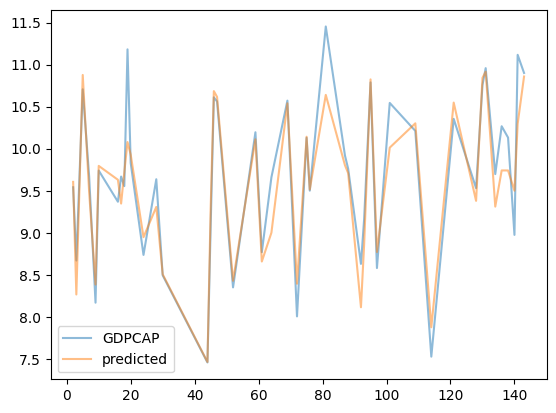

In [25]:
result[['GDPCAP', 'predicted']].plot(alpha=0.5);